# Concrete Compressive Strength Prediction

## Project Description

This project focuses on predicting the compressive strength of concrete, a critical property in construction, using a polynomial regression model. The dataset used in this project contains various features that influence the compressive strength of concrete, including the amounts of different materials and the age of the concrete.

## Dataset Description

The dataset is sourced from the UCI Machine Learning Repository and contains the following features:

- **Cement (kg in a cubic meter)**
- **Blast Furnace Slag (kg in a cubic meter)**
- **Fly Ash (kg in a cubic meter)**
- **Water (kg in a cubic meter)**
- **Superplasticizer (kg in a cubic meter)**
- **Coarse Aggregate (kg in a cubic meter)**
- **Fine Aggregate (kg in a cubic meter)**
- **Age (days)**

The target variable is:
- **Concrete Compressive Strength (MPa)**

The goal of this project is to build a predictive model that accurately estimates the compressive strength of concrete based on the given features. This involves:

1. Performing exploratory data analysis (EDA) to understand the relationships between the features and the target variable.
2. Creating polynomial features to capture non-linear relationships.
3. Building and training a polynomial regression model.
4. Evaluating the model's performance using metrics such as RMSE and R².
5. Visualizing the model's predictions compared to actual values.
6. Testing the model with new, arbitrary input values to demonstrate its practical application.

By completing this project, we aim to develop a robust predictive model that can assist in optimizing concrete mixtures for desired compressive strengths, ultimately contributing to more efficient and effective construction practices.

you can find the Data Set in this link 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'

First of all we have to import the necessary libraries to load and explore the data set

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
df = pd.read_excel(url)

# Display the first few rows of the dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Now we need to do some EDA analysis

In [26]:
# chicking if there are Null values or ronge data tyapes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [27]:
# now let's Check for the presence of missing values (NaN) in the DataFrame
df.isna().values.any()

False

In [28]:
# # Summary statistics
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


I noticed that there are some white spaces in the columns name

In [29]:
# Function to strip whitespace from column names
def strip_column_names(df):
  df.columns = df.columns.str.strip()
  return df

# Apply the function to your DataFrame
df = strip_column_names(df)

C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


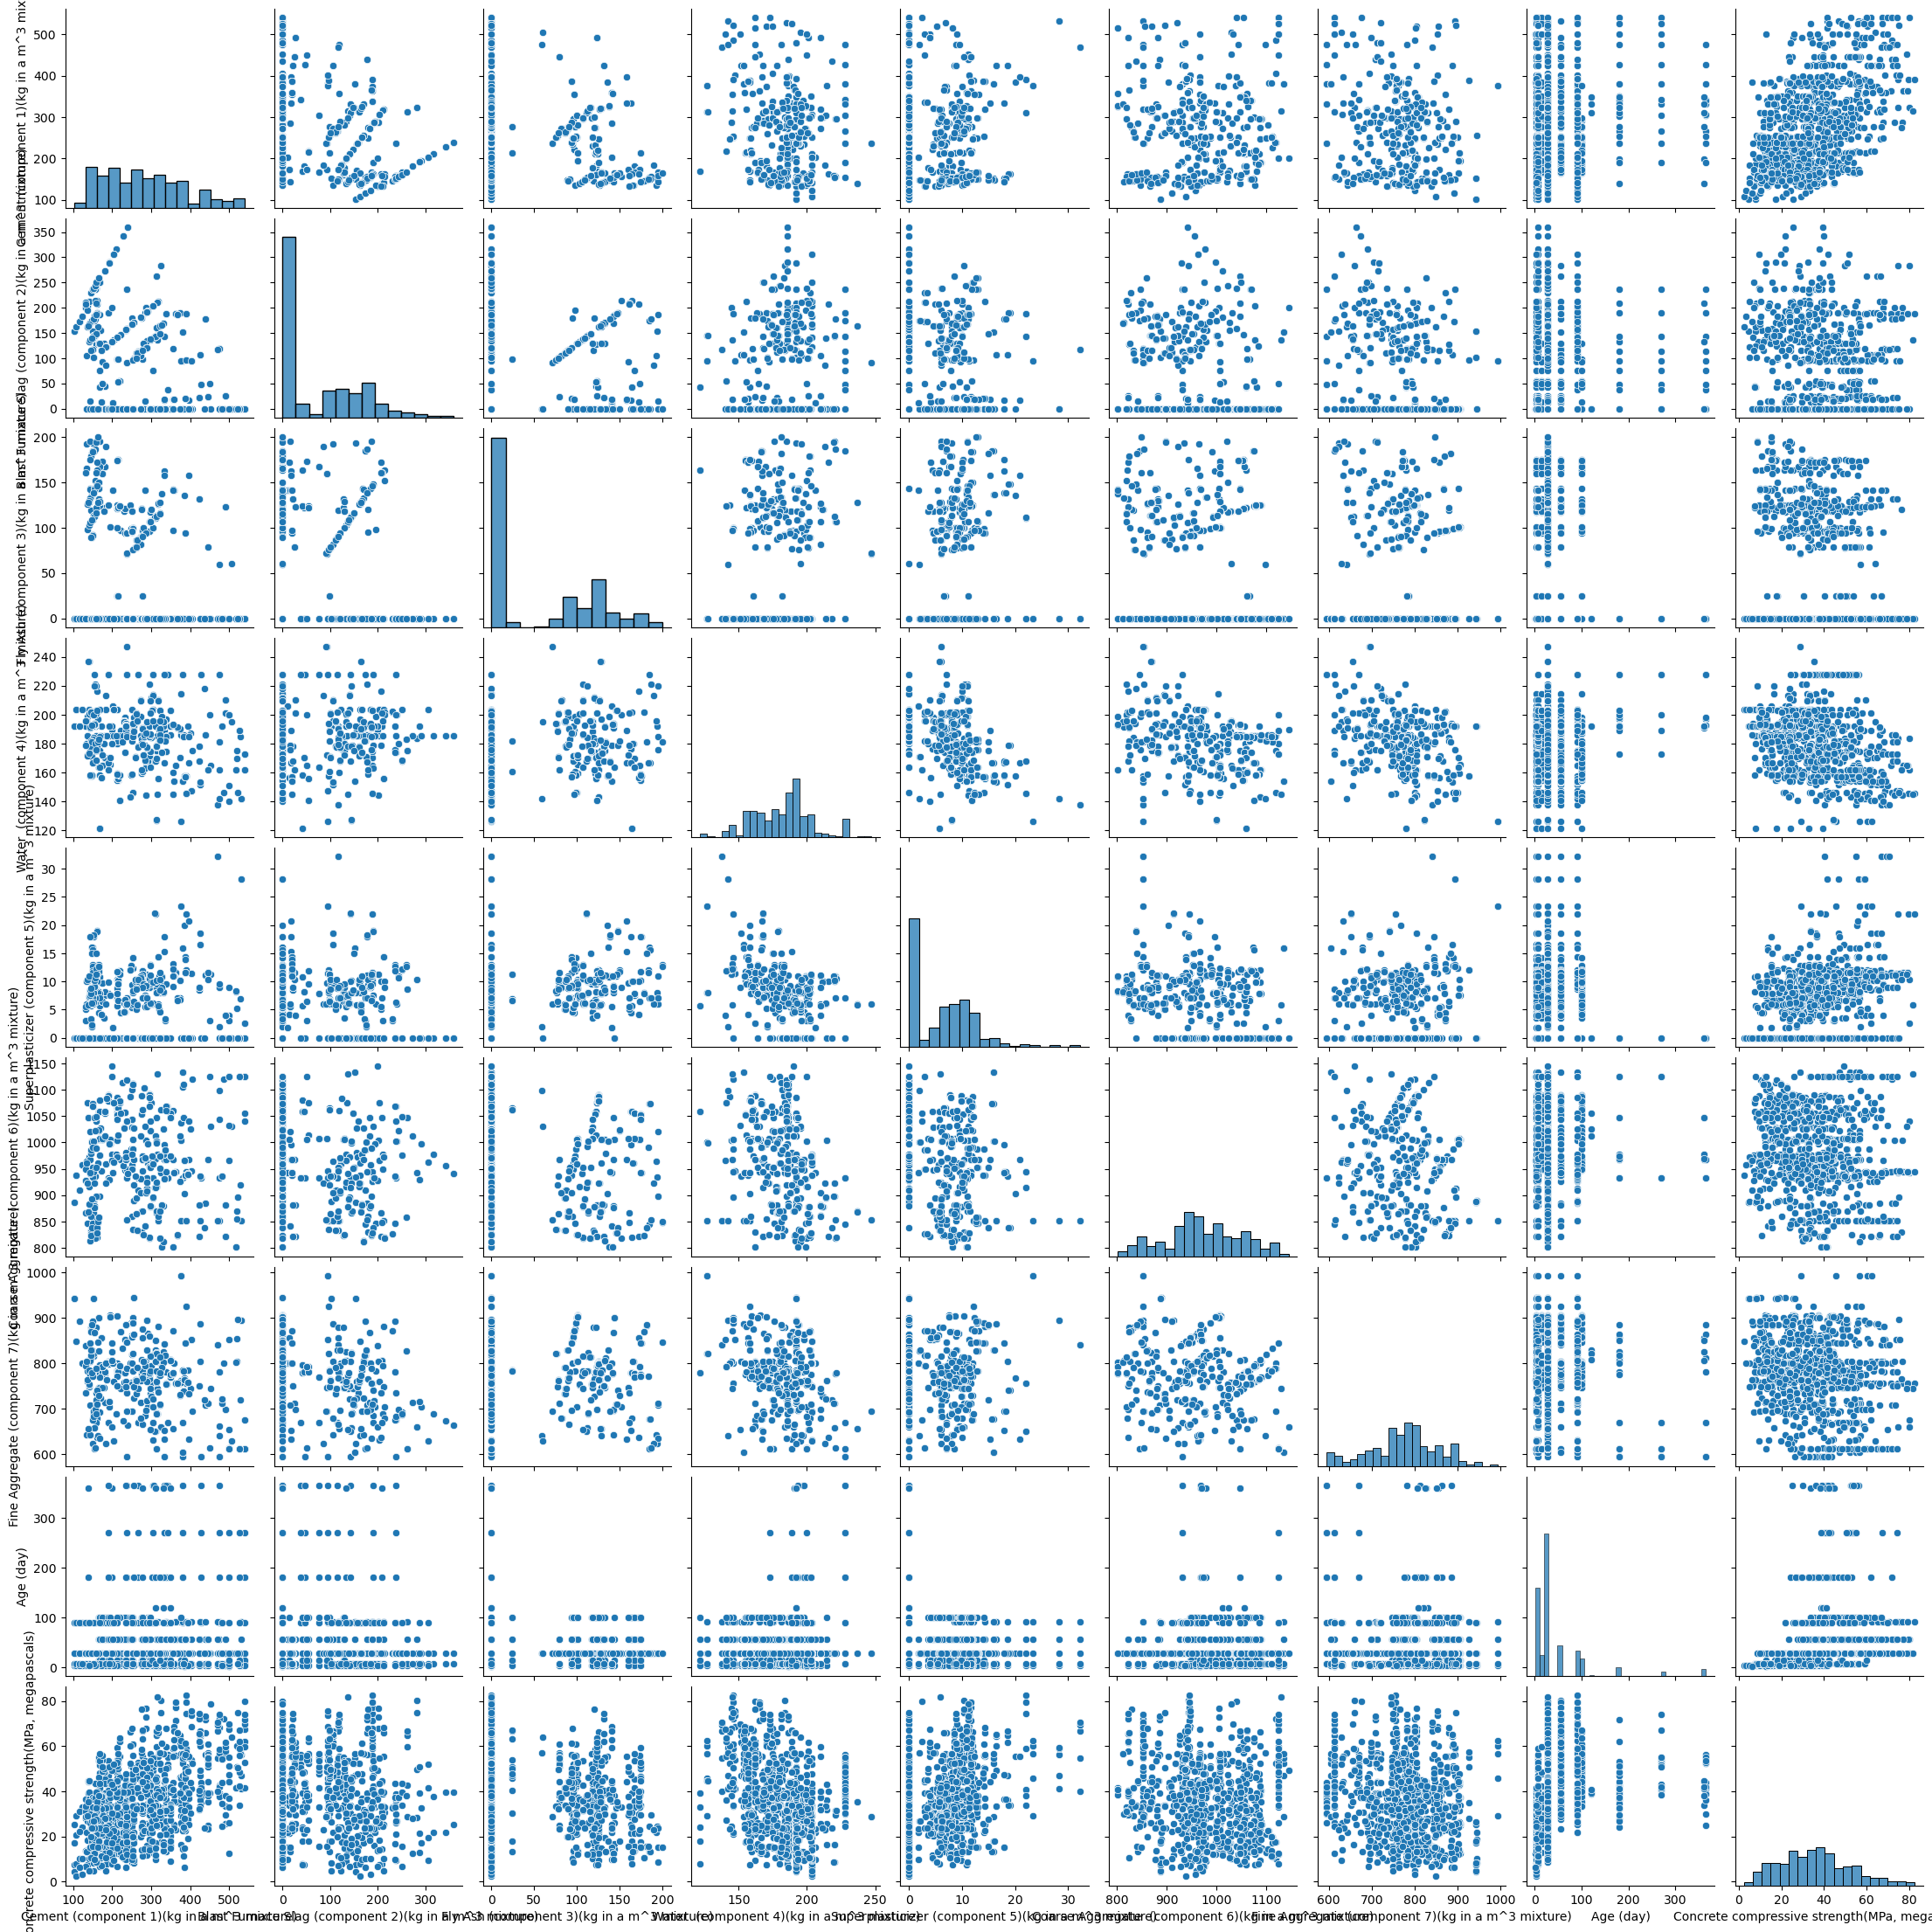

In [30]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

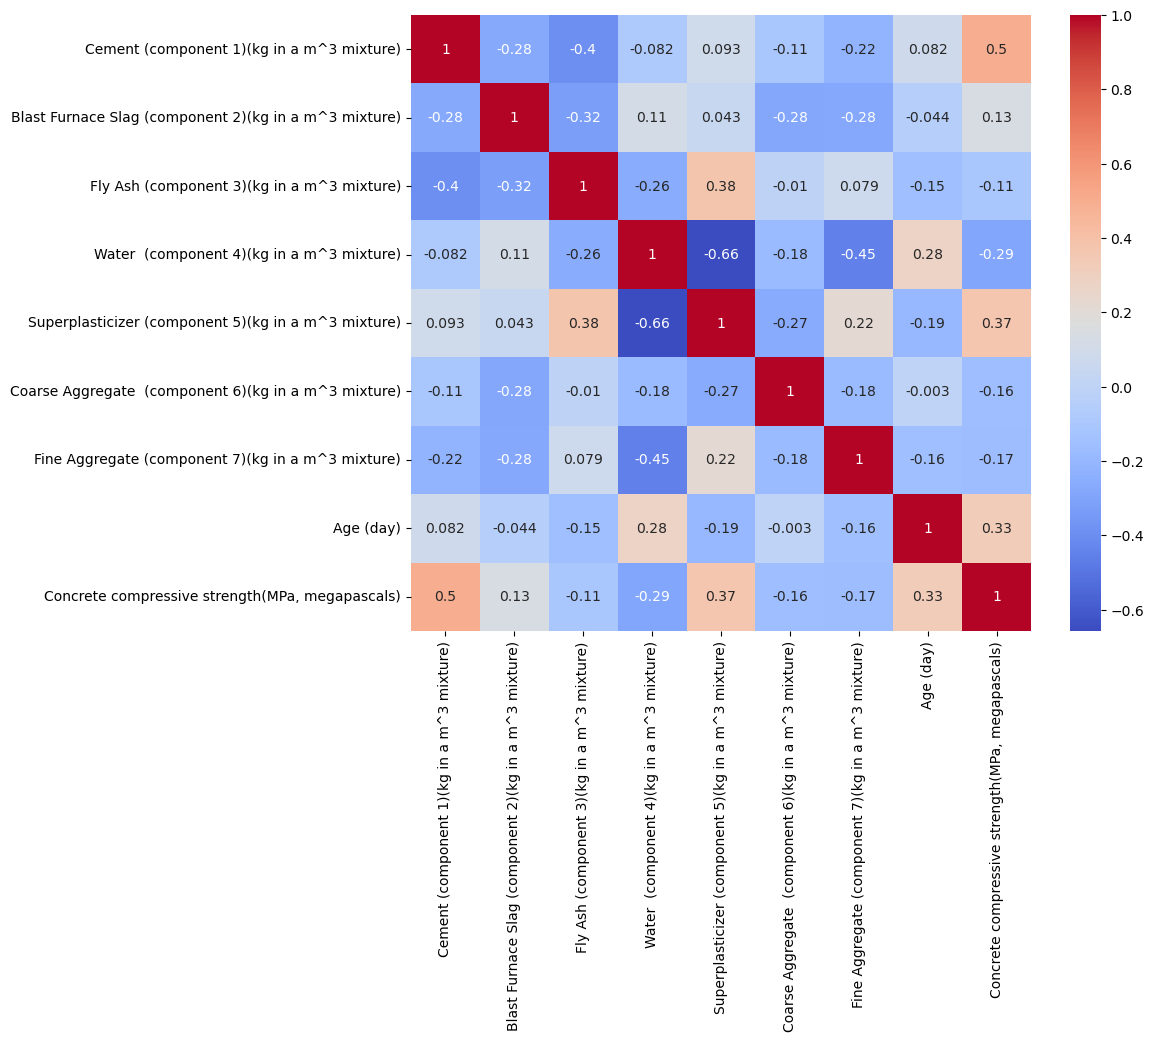

In [31]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Engineering

In [32]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals)'])
y = df['Concrete compressive strength(MPa, megapascals)']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)


### Model Building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}, Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}, Testing R²: {test_r2}')


Training RMSE: 7.286324006718451, Training R²: 0.8131159990766241
Testing RMSE: 7.4558652331404085, Testing R²: 0.7842685049726469


#### Model Performance Evaluation

- **Training RMSE: 7.29**
  - This RMSE indicates that the model's predictions are, on average, 7.29 units away from the actual compressive strength values in the training data. A lower RMSE value is better, and this suggests the model fits the training data well.

- **Training R²: 0.813**
  - An R² of 0.813 means that 81.3% of the variability in compressive strength is explained by the model on the training data. This is a good result, indicating a strong fit.

- **Testing RMSE: 7.46**
  - The RMSE on the testing data is 7.46, slightly higher than the training RMSE. This indicates the model maintains good accuracy on unseen data, with only a small increase in prediction error.

- **Testing R²: 0.784**
  - An R² of 0.784 on the testing data means that 78.4% of the variability in compressive strength is explained by the model on new, unseen data. This is a solid result, suggesting the model generalizes well.


### Model Evaluation

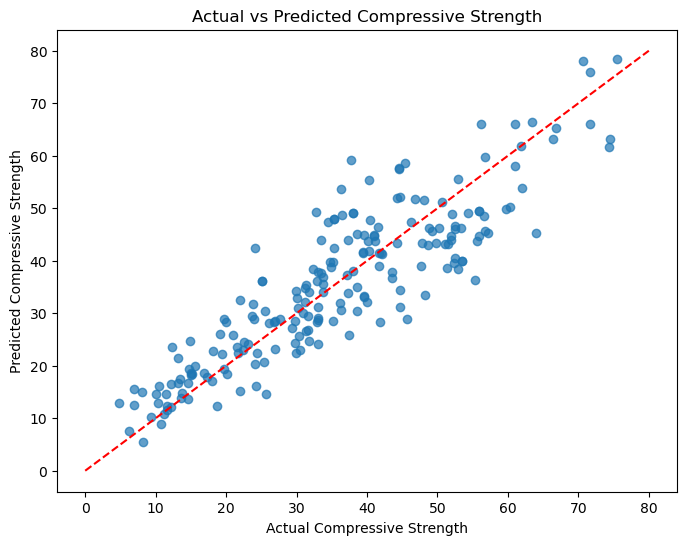

In [34]:
# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([0, 80], [0, 80], color='red', linestyle='--')
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title('Actual vs Predicted Compressive Strength')
plt.show()

#### Scatter Plot: Actual vs. Predicted Compressive Strength

We see from the Scatter Plot appove that the line fits the data very well, indicating that the model's predictions closely match the actual compressive strength values.


### let's try to predict an arbitrary values to test the model

In [35]:

# Define the new input values
new_input = np.array([[300, 80, 0, 180, 10, 900, 600, 28]])

# Create polynomial features
new_input_poly = poly.transform(new_input)

# Scale the features
new_input_poly_scaled = scaler.transform(new_input_poly)

# Predict the compressive strength
new_prediction = model.predict(new_input_poly_scaled)

print(f'Predicted Compressive Strength: {new_prediction[0]}')


Predicted Compressive Strength: 15.349263431322093


C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
